In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data = pd.read_csv('/content/employee-compensation.csv')
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [3]:
data.shape

(683277, 22)

In [4]:
data.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [6]:
data.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [7]:
data.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [8]:
df = data.dropna()
df.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [9]:
df.drop(['Other Salaries','Salaries','Organization Group','Year Type'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,0.0,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,0.0,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,0.0,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,0.0,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,2013,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,0.0,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [11]:
df.shape

(682919, 18)

In [12]:
cols = df.columns
for col in cols:
  print(col,':',df[col].nunique(),'unique vals')

Organization Group Code : 7 unique vals
Job Family Code : 59 unique vals
Job Code : 1210 unique vals
Year : 8 unique vals
Department Code : 60 unique vals
Department : 109 unique vals
Union Code : 70 unique vals
Union : 129 unique vals
Job Family : 59 unique vals
Job : 1348 unique vals
Employee Identifier : 309658 unique vals
Overtime : 261976 unique vals
Total Salary : 614930 unique vals
Retirement : 451568 unique vals
Health and Dental : 209844 unique vals
Other Benefits : 496051 unique vals
Total Benefits : 616180 unique vals
Total Compensation : 658354 unique vals


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


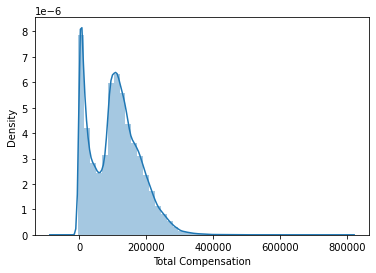

In [13]:
sns.distplot(df['Total Compensation'])
plt.show()

In [14]:
print("Skewness: %f" % df['Total Compensation'].skew())
print("Kurtosis: %f" % df['Total Compensation'].kurt())

Skewness: 0.409119
Kurtosis: 0.020116


In [15]:
df1=df.select_dtypes(include=('int64','float64'))
df1.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,2013,21.0,37730,0.0,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,2013,21.0,26574,0.0,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,2013,21.0,8148,0.0,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,2013,21.0,27436,0.0,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,2013,21.0,37730,0.0,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [16]:
corr = df1.corr()
corr

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
Organization Group Code,1.000000,-0.000739,-0.007622,-0.000127,-0.297148,-0.263737,-0.234043,-0.226596,0.033051,-0.198114,-0.252369
Year,-0.000739,1.000000,0.005062,0.838864,0.080819,0.124209,0.100283,0.161265,0.102378,0.130183,0.127971
Union Code,-0.007622,0.005062,1.000000,0.006612,0.059536,-0.048236,-0.108699,-0.105931,-0.325772,-0.164552,-0.077875
Employee Identifier,-0.000127,0.838864,0.006612,1.000000,0.081682,0.128231,0.103564,0.173667,0.094212,0.134287,0.132088
Overtime,-0.297148,0.080819,0.059536,0.081682,1.000000,0.501851,0.311004,0.299711,0.091801,0.291585,0.459111
Total Salary,-0.263737,0.124209,-0.048236,0.128231,0.501851,1.000000,0.928025,0.745272,0.652867,0.902593,0.994322
Retirement,-0.234043,0.100283,-0.108699,0.103564,0.311004,0.928025,1.000000,0.782658,0.677758,0.960589,0.953149
Health and Dental,-0.226596,0.161265,-0.105931,0.173667,0.299711,0.745272,0.782658,1.000000,0.626676,0.896516,0.796369
Other Benefits,0.033051,0.102378,-0.325772,0.094212,0.091801,0.652867,0.677758,0.626676,1.000000,0.796536,0.700391
Total Benefits,-0.198114,0.130183,-0.164552,0.134287,0.291585,0.902593,0.960589,0.896516,0.796536,1.000000,0.943277


In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist,cdist

In [18]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X= df1.drop(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Overtime', 'Retirement', 'Health and Dental',
       'Other Benefits'],axis=1)

wss = []
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    wss_iter = model.inertia_
    wss.append(wss_iter)

In [19]:
centers = pd.DataFrame({'clusters':K,'WSS':wss})
centers

,clusters,WSS
0,1,5.908381e+15
1,2,2.120801e+15
2,3,9.047469e+14
3,4,5.484335e+14
4,5,3.813402e+14
5,6,2.923270e+14
6,7,2.245282e+14
7,8,1.831605e+14
8,9,1.520080e+14


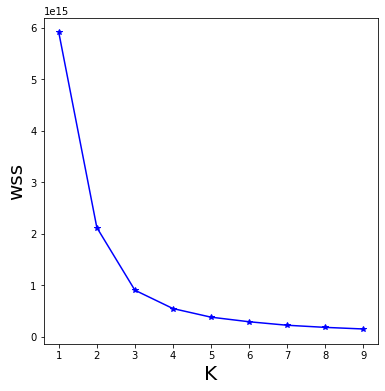

In [20]:
plt.figure(figsize=(6,6))
plt.plot(K,wss,'b*-')
plt.xlabel('K',size=20)
plt.ylabel('wss',size=20)
plt.show()

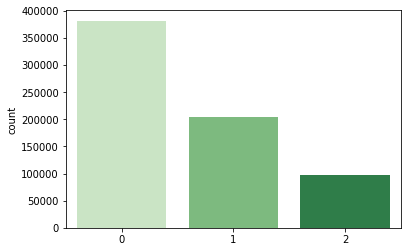

In [21]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(df1)
sns.countplot(x=kmeans.labels_, palette='Greens')
plt.show()

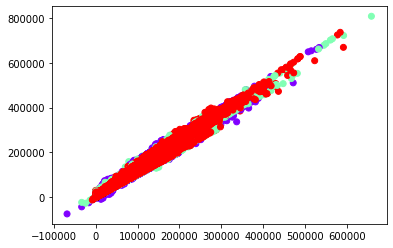

In [22]:
plt.scatter(df1.iloc[:,5].values,df.iloc[:,-1].values, c=kmeans.labels_, cmap="rainbow")

plt.show()

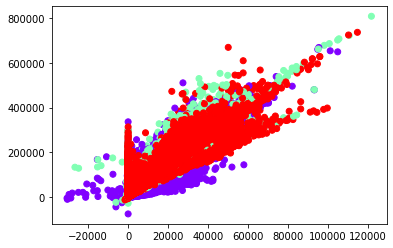

In [23]:
plt.scatter(df1.iloc[:,6].values,df.iloc[:,-1].values, c=kmeans.labels_, cmap="rainbow")

plt.show()

In [24]:
#session crashes

# import scipy
# from scipy.cluster.hierarchy import dendrogram,linkage
# from scipy.cluster.hierarchy import fcluster
# from scipy.cluster.hierarchy import cophenet
# from sklearn.cluster import AgglomerativeClustering

# plt.figure(figsize=(15,10))
# Z=linkage(df1.drop(['Total Compensation'],axis=1), method='single')
# dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
# plt.xlabel("Cluster Size",fontsize=30)
# plt.ylabel("Distances",fontsize=30)
# plt.show()